In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_D.csv')

# Exploratory Data Analysis

In [3]:
df.shape

(41259, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [5]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [7]:
# Unique value in each column
for c in df:
    print(f'{c}: {df[c].nunique()}')
    print(df[c].unique())
    print()

Unnamed: 0: 41259
[    0     1     2 ... 41256 41257 41258]

id: 41259
[106473  62345 126615 ...   3091  20130 161328]

CustomerId: 13272
[15639576 15769582 15675888 ... 15792588 15695096 15583460]

Surname: 2274
['Sarratt' 'Hanson' 'Austin' ... 'Hobbs' 'Rivero' 'Laurie']

CreditScore: 442
[652. 464. 620. 598. 682. 746. 636. 685. 809. 439. 656. 741. 675. 532.
 616. 669. 756. 705. 662. 635. 753. 576. 487. 697. 718. 556. 717. 711.
 667. 528. 588. 592. 686. 625. 807. 555. 714. 544. 724. 769. 695. 791.
 727. 679. 692. 658. 492. 739. 678. 684. 681. 600. 633. 671. 611. 529.
 590. 543. 758. 710. 774. 709. 567. 648. 453. 637. 726. 704. 646. 535.
 702. 743. 638. 531. 623. 698. 593. 586. 816. 655. 619. 835. 642. 582.
 564. 518. 732. 762. 703. 569. 516. 578. 645. 594. 525. 494. 609. 683.
 661. 605. 607. 634. 781. 844. 650. 663. 731. 660. 583. 641. 602. 513.
 621. 596. 554. 589. 587. 472. 580. 628. 766. 665. 696. 560. 850. 730.
 606. 626. 627. 715. 565. 674. 749. 552. 736. 687. 745. 570. 507. 624.

In [8]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Feature Engineering

In [10]:
# Fill the Null Value in CreditScore with its mean
df['CreditScore'].fillna(df['CreditScore'].mean(), inplace = True)

In [11]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [12]:
# Drop the 'Unnamed: 0' column because it's not relevant
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# Drop the 'Surname' column
df.drop('Surname', axis=1, inplace=True)

In [14]:
# Encoding for object feature with LabelEncoder
from sklearn.preprocessing import LabelEncoder

labelEnc = LabelEncoder()
df['Geography'] = labelEnc.fit_transform(df['Geography'])
df['Gender'] = labelEnc.fit_transform(df['Gender'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               41259 non-null  int64  
 1   CustomerId       41259 non-null  int64  
 2   CreditScore      41259 non-null  float64
 3   Geography        41259 non-null  int32  
 4   Gender           41259 non-null  int32  
 5   Age              41259 non-null  float64
 6   Tenure           41259 non-null  int64  
 7   Balance          41259 non-null  float64
 8   NumOfProducts    41259 non-null  int64  
 9   HasCrCard        41259 non-null  int64  
 10  IsActiveMember   41259 non-null  int64  
 11  EstimatedSalary  41259 non-null  float64
 12  churn            41259 non-null  int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 3.8 MB


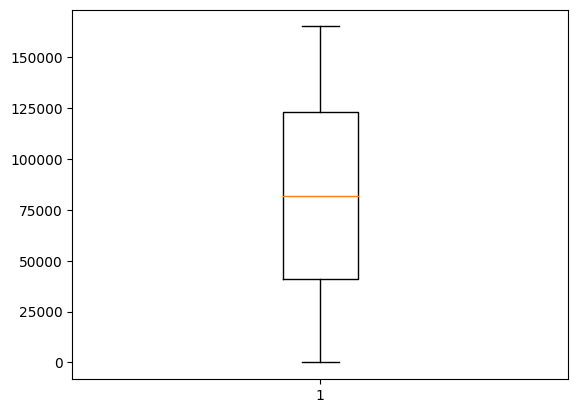

id


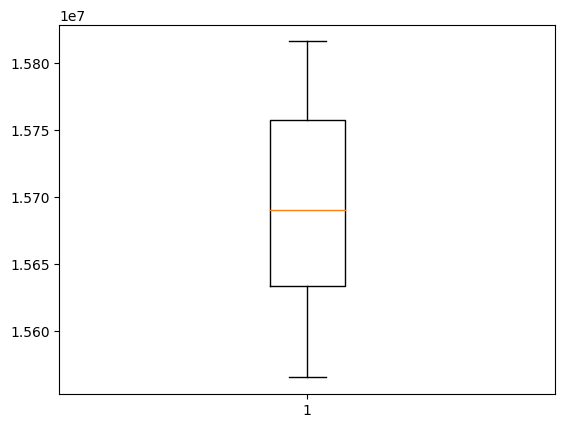

CustomerId


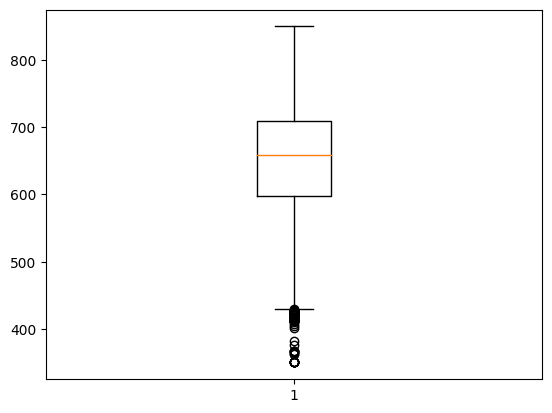

CreditScore


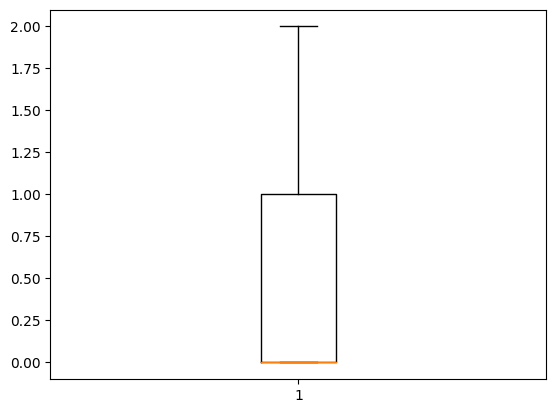

Geography


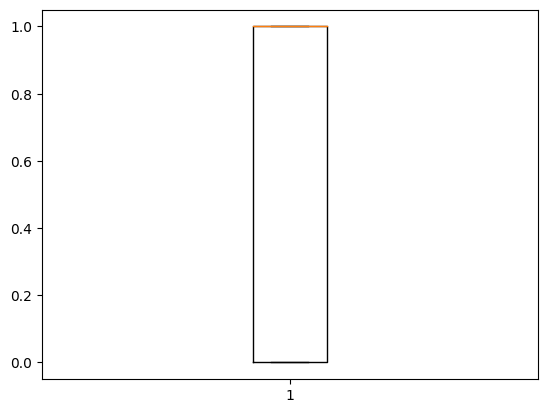

Gender


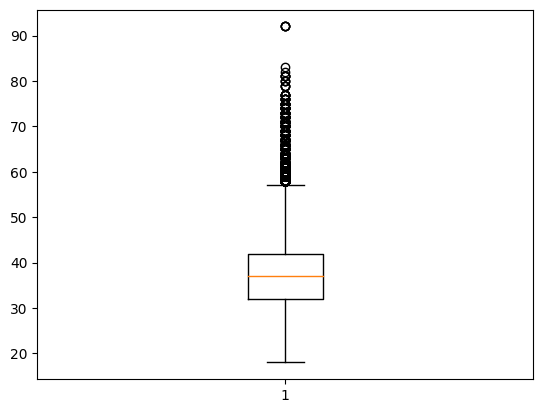

Age


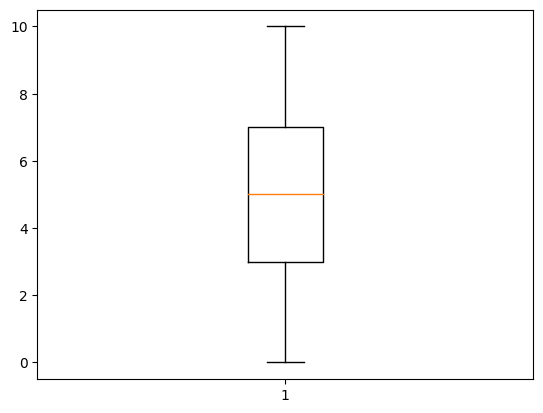

Tenure


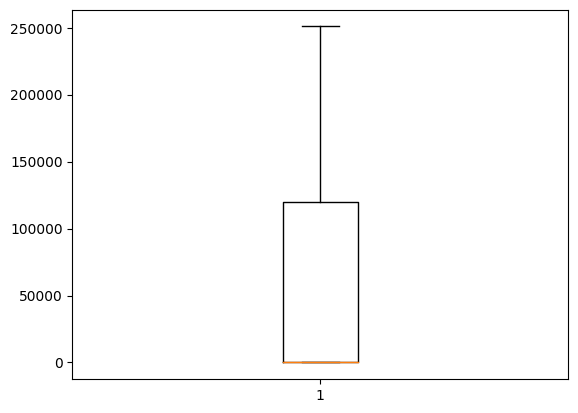

Balance


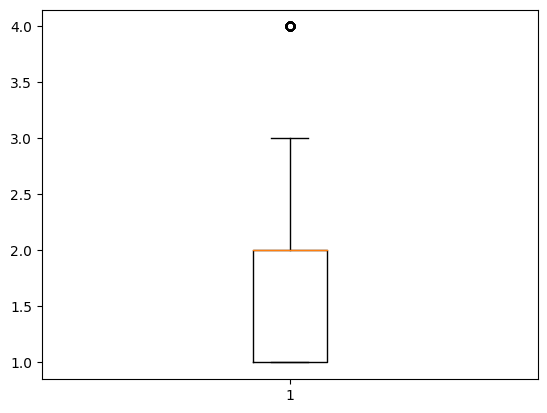

NumOfProducts


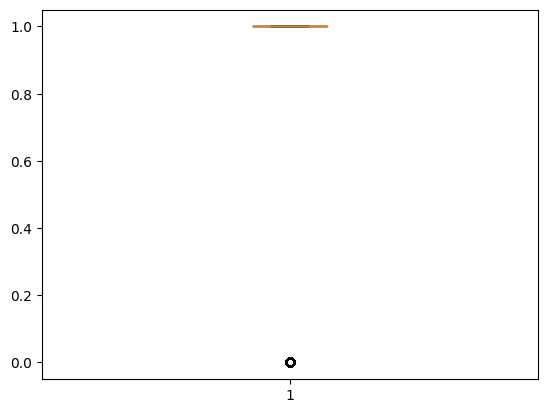

HasCrCard


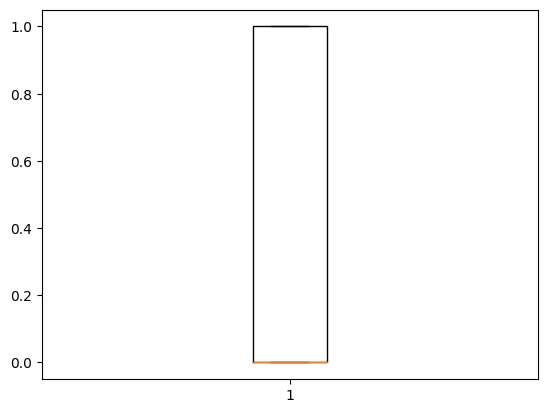

IsActiveMember


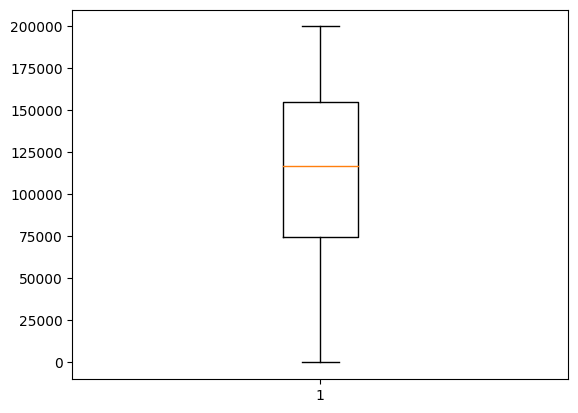

EstimatedSalary


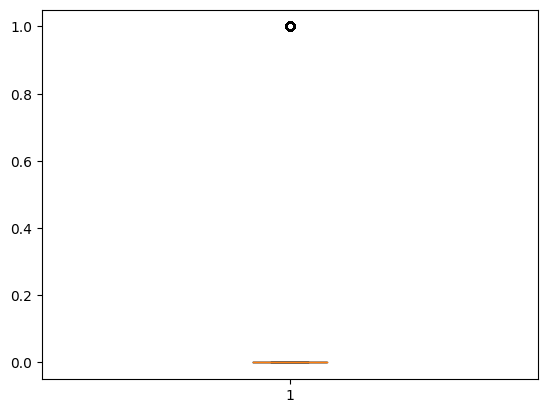

churn


In [16]:
# Check Outlier
for col in df:
    plt.boxplot(df[col])
    plt.show()
    print(col)

In [17]:
# Remove Outlier in feature CreditScore and Age
#store outlier value
mean = df['CreditScore'].mean()
std = df['CreditScore'].std()
Tmax = mean + (3 * std)
Tmin = mean - (3 * std)
Outlier = df[(df['CreditScore'] < Tmin) | (df['CreditScore'] > Tmax)]['CreditScore'].values
print(Outlier)
print(len(Outlier))

[365. 350. 416. 350. 413. 363. 414. 411. 382. 411. 367. 411. 411. 350.
 363. 411. 405. 410. 408. 365. 350. 350. 416. 350. 411. 411. 350. 350.
 401. 415. 376. 350. 413. 413. 367. 415. 367.]
37


In [18]:
df = df[~df['CreditScore'].isin(Outlier)]

In [19]:
mean = df['Age'].mean()
std = df['Age'].std()
Tmax = mean + (3 * std)
Tmin = mean - (3 * std)
Outlier = df[(df['Age'] < Tmin) | (df['Age'] > Tmax)]['Age'].values
print(Outlier)
print(len(Outlier))

[65. 70. 76. 74. 69. 67. 71. 66. 67. 71. 71. 70. 69. 67. 70. 71. 71. 71.
 71. 79. 67. 66. 71. 66. 67. 71. 70. 70. 66. 69. 69. 66. 72. 67. 69. 70.
 74. 72. 69. 66. 70. 74. 66. 69. 66. 69. 66. 66. 67. 67. 66. 66. 67. 71.
 81. 80. 92. 67. 71. 67. 70. 66. 75. 70. 67. 67. 74. 66. 69. 66. 71. 67.
 66. 67. 69. 71. 67. 71. 71. 74. 74. 72. 71. 72. 65. 73. 65. 66. 71. 68.
 68. 71. 66. 73. 66. 66. 69. 67. 72. 66. 67. 66. 67. 71. 66. 66. 67. 70.
 66. 66. 82. 71. 68. 68. 80. 71. 75. 70. 80. 65. 70. 65. 69. 76. 92. 66.
 67. 67. 66. 79. 67. 72. 67. 67. 79. 71. 67. 66. 73. 72. 65. 66. 81. 72.
 79. 71. 67. 67. 66. 68. 70. 71. 70. 66. 69. 67. 76. 71. 66. 74. 71. 74.
 69. 72. 67. 65. 67. 65. 69. 66. 66. 67. 72. 66. 67. 81. 66. 66. 67. 75.
 67. 72. 74. 68. 73. 72. 66. 71. 67. 71. 69. 66. 65. 69. 71. 77. 71. 72.
 73. 67. 67. 67. 70. 66. 81. 66. 71. 72. 67. 71. 67. 66. 67. 77. 65. 71.
 66. 71. 77. 69. 67. 73. 73. 67. 72. 66. 68. 75. 65. 67. 72. 66. 66. 75.
 76. 66. 72. 66. 66. 71. 69. 71. 66. 66. 67. 66. 71

In [20]:
df = df[~df['Age'].isin(Outlier)]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40744 entries, 1 to 41258
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               40744 non-null  int64  
 1   CustomerId       40744 non-null  int64  
 2   CreditScore      40744 non-null  float64
 3   Geography        40744 non-null  int32  
 4   Gender           40744 non-null  int32  
 5   Age              40744 non-null  float64
 6   Tenure           40744 non-null  int64  
 7   Balance          40744 non-null  float64
 8   NumOfProducts    40744 non-null  int64  
 9   HasCrCard        40744 non-null  int64  
 10  IsActiveMember   40744 non-null  int64  
 11  EstimatedSalary  40744 non-null  float64
 12  churn            40744 non-null  int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 4.0 MB


In [22]:
#Convert all feature to int
columns_toConvert = ['CreditScore','Age','Balance','EstimatedSalary']
df[columns_toConvert] = df[columns_toConvert].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40744 entries, 1 to 41258
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               40744 non-null  int64
 1   CustomerId       40744 non-null  int64
 2   CreditScore      40744 non-null  int32
 3   Geography        40744 non-null  int32
 4   Gender           40744 non-null  int32
 5   Age              40744 non-null  int32
 6   Tenure           40744 non-null  int64
 7   Balance          40744 non-null  int32
 8   NumOfProducts    40744 non-null  int64
 9   HasCrCard        40744 non-null  int64
 10  IsActiveMember   40744 non-null  int64
 11  EstimatedSalary  40744 non-null  int32
 12  churn            40744 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 3.4 MB


# Training Machine Learning Model

## Splitting data into training and testing

In [24]:
input_df = df.drop('churn',axis=1)
output_df = df['churn']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

## Classification using Random Forest

In [26]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

DT_class = DecisionTreeClassifier()
DT_class.fit(x_train, y_train)
y_predict=DT_class.predict(x_test)

In [27]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6412
           1       0.53      0.55      0.54      1737

    accuracy                           0.80      8149
   macro avg       0.70      0.71      0.70      8149
weighted avg       0.80      0.80      0.80      8149



### Tuning parameters using GridSearchCv

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [29]:
DT_class2 = DecisionTreeClassifier()
DT_class2= GridSearchCV(DT_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)

In [30]:
DT_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", DT_class2.best_params_)
print("Accuracy :",DT_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 6}
Accuracy : 0.8560515416474919


In [31]:
#Train the data using based parameter
DT_class_best = DecisionTreeClassifier(criterion= 'entropy',max_depth=6)

In [32]:
DT_class_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [33]:
y_predict_best=DT_class_best.predict(x_test)

### Evaluate Model

In [34]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6412
           1       0.70      0.51      0.59      1737

    accuracy                           0.85      8149
   macro avg       0.79      0.73      0.75      8149
weighted avg       0.84      0.85      0.84      8149



## Classification using XGBoost

In [37]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import xgboost as xgb
from xgboost import XGBClassifier

XGBoost_class = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
XGBoost_class.fit(x_train, y_train)
y_predict=XGBoost_class.predict(x_test)

In [43]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6412
           1       0.71      0.54      0.61      1737

    accuracy                           0.85      8149
   macro avg       0.80      0.74      0.76      8149
weighted avg       0.85      0.85      0.85      8149



### Tuning parameters using GridSearchCv

In [44]:
parameters = {
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [46]:
XGBoost_class2 = XGBClassifier()
XGBoost_class2 = GridSearchCV(XGBoost_class2, 
                   parameters, 
                   scoring='accuracy', 
                   cv=3)

In [47]:
XGBoost_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", XGBoost_class2.best_params_)
print("Accuracy :",XGBoost_class2.best_score_)

Tuned Hyperparameters : {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
Accuracy : 0.8657462801043105


In [50]:
#Train the data using based parameter
XGBoost_class_best = XGBClassifier(colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, subsample=1.0)

In [51]:
XGBoost_class_best.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
y_predict_best=XGBoost_class_best.predict(x_test)

### Evaluate Model

In [53]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6412
           1       0.74      0.52      0.61      1737

    accuracy                           0.86      8149
   macro avg       0.81      0.73      0.76      8149
weighted avg       0.85      0.86      0.85      8149

